In [1]:
from perses.analysis import utils
from openmmtools.multistate import MultiStateReporter, MultiStateSamplerAnalyzer
from simtk import unit
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import logging
logger = logging.getLogger('my-logger')
logger.setLevel(logging.WARNING)
# logger.propagate = False

In [14]:
# Given a path, get dg and ddg
def analyze(path):
    reporter = MultiStateReporter(path)
    analyzer = MultiStateSamplerAnalyzer(reporter)
    f_ij, df_ij = analyzer.get_free_energy()
    f = f_ij[0,-1] # units = kT
#     f = f_ij[0,-1] * analyzer.kT
#     dg = f.in_units_of(unit.kilocalories_per_mole)
    df = df_ij[0, -1]
#     df = df_ij[0, -1] * analyzer.kT
#     ddg = df.in_units_of(unit.kilocalories_per_mole)
    return f, df

def analyze_dom(path):
    reporter = MultiStateReporter(path)
    ncfile = utils.open_netcdf(path)
    n_iterations = ncfile.variables['last_iteration'][0]
    dg, ddg = list(), list()
    for step in range (1, n_iterations + 1, 50): # add 1 because not 0-indexed
        analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=step)
        f_ij, df_ij = analyzer.get_free_energy()
        dg.append(f_ij[0,-1])
        ddg.append(df_ij[0,-1])
    # Get final free energy
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=n_iterations)
    f_ij, df_ij = analyzer.get_free_energy()
    dg.append(f_ij[0,-1])
    ddg.append(df_ij[0,-1])
    return dg, ddg

In [6]:
# Global variables
amino_acids = ['ALA', 'CYS', 'SER', 'THR']

# Create list of tuples for every pair of amino acids
pairs = list(itertools.permutations(amino_acids, r=2))

### New sim data (after dir structure reorg and regenerating htfs) -- non default electrostatics

In [ ]:
import pickle
for r in [6,7,8]:
    d_results = {}
    for i in tqdm_notebook(range(12)):
        print (f"dir {i} replicate {r}")
        output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{r}/{i}/'
        solvent_path = os.path.join(output_dir, f"{i}_solvent.nc")
        vacuum_path = os.path.join(output_dir, f"{i}_vacuum.nc")
        solvent_dg, solvent_ddg = analyze_dom(solvent_path)
        vacuum_dg, vacuum_ddg = analyze_dom(vacuum_path)
#         solvation_dg = vacuum_dg[-1] - solvent_dg[-1]
#         solvation_ddg = (vacuum_ddg[-1]**2 + solvent_ddg[-1]**2)**0.5
        d_results[pairs[i]] = (solvent_dg, solvent_ddg, vacuum_dg, vacuum_ddg)
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{r}/d_results.pickle', 'wb') as f:
        pickle.dump(d_results, f)

In [4]:
import pickle
with open("/data/chodera/zhangi/perses_benchmark/repex/6/d_results.pickle", "rb") as f:
    d_results_6 = pickle.load(f)

In [5]:
import pickle
with open("/data/chodera/zhangi/perses_benchmark/repex/7/d_results.pickle", "rb") as f:
    d_results_7 = pickle.load(f)

In [6]:
import pickle
with open("/data/chodera/zhangi/perses_benchmark/repex/8/d_results.pickle", "rb") as f:
    d_results_8 = pickle.load(f)

In [7]:
# Generate replica mixing plots
from perses.analysis import utils
for r in [6,7,8]:
    for i in range(12):
        print(f"dir {i} rep {r} solvent")
        path = f"/data/chodera/zhangi/perses_benchmark/repex/{r}/{i}/{i}_solvent.nc"
        utils.plot_replica_mixing(path, title=f"{pairs[i][0]} -> {pairs[i][1]} solvent", filename=f"{path[:-3]}_replicas.png")
        plt.clf()
        print(f"dir {i} rep {r} vacuum")
        path = f"/data/chodera/zhangi/perses_benchmark/repex/{r}/{i}/{i}_vacuum.nc"
        utils.plot_replica_mixing(path, title=f"{pairs[i][0]} -> {pairs[i][1]} vacuum", filename=f"{path[:-3]}_replicas.png")
        plt.clf()

dir 0 rep 6 solvent
dir 0 rep 6 vacuum
dir 1 rep 6 solvent
dir 1 rep 6 vacuum
dir 2 rep 6 solvent
dir 2 rep 6 vacuum
dir 3 rep 6 solvent
dir 3 rep 6 vacuum
dir 4 rep 6 solvent
dir 4 rep 6 vacuum
dir 5 rep 6 solvent
dir 5 rep 6 vacuum
dir 6 rep 6 solvent
dir 6 rep 6 vacuum
dir 7 rep 6 solvent
dir 7 rep 6 vacuum
dir 8 rep 6 solvent
dir 8 rep 6 vacuum
dir 9 rep 6 solvent
dir 9 rep 6 vacuum
dir 10 rep 6 solvent


/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/perses-0.6.0.dev0-py3.7.egg/perses/analysis/utils.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=n_states, ncols=2, sharex='col',sharey=True,figsize=(15,2*n_states), squeeze=True, gridspec_kw={'width_ratios': [5, 1]})


dir 10 rep 6 vacuum
dir 11 rep 6 solvent
dir 11 rep 6 vacuum
dir 0 rep 7 solvent
dir 0 rep 7 vacuum
dir 1 rep 7 solvent
dir 1 rep 7 vacuum
dir 2 rep 7 solvent
dir 2 rep 7 vacuum
dir 3 rep 7 solvent
dir 3 rep 7 vacuum
dir 4 rep 7 solvent
dir 4 rep 7 vacuum
dir 5 rep 7 solvent
dir 5 rep 7 vacuum
dir 6 rep 7 solvent
dir 6 rep 7 vacuum
dir 7 rep 7 solvent
dir 7 rep 7 vacuum
dir 8 rep 7 solvent
dir 8 rep 7 vacuum
dir 9 rep 7 solvent
dir 9 rep 7 vacuum
dir 10 rep 7 solvent
dir 10 rep 7 vacuum
dir 11 rep 7 solvent
dir 11 rep 7 vacuum
dir 0 rep 8 solvent
dir 0 rep 8 vacuum
dir 1 rep 8 solvent
dir 1 rep 8 vacuum
dir 2 rep 8 solvent
dir 2 rep 8 vacuum
dir 3 rep 8 solvent
dir 3 rep 8 vacuum
dir 4 rep 8 solvent
dir 4 rep 8 vacuum
dir 5 rep 8 solvent
dir 5 rep 8 vacuum
dir 6 rep 8 solvent
dir 6 rep 8 vacuum
dir 7 rep 8 solvent
dir 7 rep 8 vacuum
dir 8 rep 8 solvent
dir 8 rep 8 vacuum
dir 9 rep 8 solvent
dir 9 rep 8 vacuum
dir 10 rep 8 solvent
dir 10 rep 8 vacuum
dir 11 rep 8 solvent
dir 11 rep 8 va

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

In [10]:
def plot_series(dg, ddg, mean, i, phase):
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex='col', figsize=(10,2*3), squeeze=True)
    for r in range(len(dg)):
        dg_discarded = dg[r][30:]
        ddg_discarded = ddg[r][30:]

        # dg
        ax = axes[0]
        x = [(i)/20 + 1.5 for i in range(len(dg_discarded))]
        y = dg_discarded
        ax.plot(x, y, color=sns.color_palette()[r])
        ax.fill_between(x, y - ddg_discarded, y + ddg_discarded, alpha=0.5)

        # ddg
        ax = axes[1]
        x = [(i)/20 + 1.5 for i in range(len(ddg_discarded))]
        y = ddg_discarded
        ax.plot(x, y, color=sns.color_palette()[0])

        # deviation from mean
        ax = axes[2]
        x = [(i)/20 + 1.5 for i in range(len(dg_discarded))]
        y = np.array(dg_discarded) - mean # Need to the average solvent dg across replicates
        ax.plot(x, y, color=sns.color_palette()[0])

    axes[0].set_ylabel("dG (kT)")
    axes[1].set_ylabel("ddG (kT)")
    axes[2].set_ylabel("ddG (kT)")
    axes[2].set_xlabel("$t_{repex}$ (ns)")
    
    axes[0].set_title(f"{pairs[i][0]} -> {pairs[i][1]} {phase}")
    plt.savefig(f"/data/chodera/zhangi/perses_benchmark/repex/analysis_10-11/{i}_{phase}_series.png", dpi=500)
    plt.clf()

In [12]:
# Generate dg, ddg, and discrepancy vs. time plots
for i, pair in enumerate(pairs):
    print(i)
    solvent_dg = [np.array(d_results_6[pair][0]), np.array(d_results_7[pair][0]), np.array(d_results_8[pair][0])]
    solvent_ddg = [np.array(d_results_6[pair][1]), np.array(d_results_7[pair][1]), np.array(d_results_8[pair][1])]
    vacuum_dg = [np.array(d_results_6[pair][2]), np.array(d_results_7[pair][2]), np.array(d_results_8[pair][2])]
    vacuum_ddg = [np.array(d_results_6[pair][3]), np.array(d_results_7[pair][3]), np.array(d_results_8[pair][3])]
    
    solvent_mean = np.mean([solvent_dg[0][-1], solvent_dg[1][-1], solvent_dg[2][-1]])
    vacuum_mean = np.mean([vacuum_dg[0][-1], vacuum_dg[1][-1], vacuum_dg[2][-1]]) 
    
    plot_series(solvent_dg, solvent_ddg, solvent_mean, i,'solvent')
    plot_series(vacuum_dg, vacuum_ddg, vacuum_mean, i, 'vacuum')


0
1
2
3
4
5
6
7
8
9
10


/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


11


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [8]:
# Generate table
d_combined = {}
rows = [('ALA', 'SER'), ('ALA', 'CYS'), ('ALA', 'THR'), ('SER', 'CYS'), ('SER', 'THR'), ('CYS', 'THR')]

for i, pair in enumerate(pairs):
    solvent_dg = [np.array(d_results_6[pair][0][-1]), np.array(d_results_7[pair][0][-1]), np.array(d_results_8[pair][0][-1])]
    solvent_ddg = [np.array(d_results_6[pair][1][-1]), np.array(d_results_7[pair][1][-1]), np.array(d_results_8[pair][1][-1])]
    vacuum_dg = [np.array(d_results_6[pair][2][-1]), np.array(d_results_7[pair][2][-1]), np.array(d_results_8[pair][2][-1])]
    vacuum_ddg = [np.array(d_results_6[pair][3][-1]), np.array(d_results_7[pair][3][-1]), np.array(d_results_8[pair][3][-1])]
    
    solvation_dg = [vac - sol for sol, vac in zip(solvent_dg, vacuum_dg)]
    solvation_ddg = [(vac**2 + sol**2)**0.5 for sol, vac in zip(solvent_ddg, vacuum_ddg)]
    
    if pair in rows:
        d_combined[pair] = [np.mean(solvation_dg), np.mean(solvation_ddg)]

for pair in pairs:
    if pair not in d_combined:
        reversed_pair = pair[::-1]
        forward_solvation_dg = d_combined[reversed_pair][0]
        forward_solvation_ddg = d_combined[reversed_pair][1]
        
        solvent_dg = [np.array(d_results_6[pair][0][-1]), np.array(d_results_7[pair][0][-1]), np.array(d_results_8[pair][0][-1])]
        solvent_ddg = [np.array(d_results_6[pair][1][-1]), np.array(d_results_7[pair][1][-1]), np.array(d_results_8[pair][1][-1])]
        vacuum_dg = [np.array(d_results_6[pair][2][-1]), np.array(d_results_7[pair][2][-1]), np.array(d_results_8[pair][2][-1])]
        vacuum_ddg = [np.array(d_results_6[pair][3][-1]), np.array(d_results_7[pair][3][-1]), np.array(d_results_8[pair][3][-1])]
    
        solvation_dg = [vac - sol for sol, vac in zip(solvent_dg, vacuum_dg)]
        solvation_ddg = [(vac**2 + sol**2)**0.5 for sol, vac in zip(solvent_ddg, vacuum_ddg)]
        
        dg = np.mean(solvation_dg)
        ddg = np.mean(solvation_ddg)
        d_combined[reversed_pair] += [dg, ddg, abs(forward_solvation_dg) - abs(dg), abs(forward_solvation_ddg) - abs(ddg)]



In [9]:
df = pd.DataFrame.from_dict(d_combined, orient='index', columns=['forward solvation dG', 
                                                            'forward solvation ddG', 
                                                            'reverse solvation dG',
                                                            'reverse solvation ddG',
                                                            'discrepancy dG',
                                                            'discrepancy ddG'
                                                           ]
                      
                      )

In [10]:
df.reindex(index=rows)

,forward solvation dG,forward solvation ddG,reverse solvation dG,reverse solvation ddG,discrepancy dG,discrepancy ddG
"(ALA, SER)",2.666296,0.067755,-4.843187,0.147884,-2.176890,-0.080129
"(ALA, CYS)",-0.604621,0.058589,0.758005,0.075938,-0.153384,-0.017350
"(ALA, THR)",2.903371,0.087121,-3.996512,0.124729,-1.093142,-0.037608
"(SER, CYS)",-4.521507,0.169658,4.553164,0.153822,-0.031657,0.015836
"(SER, THR)",0.175012,0.053950,-1.652593,0.065572,-1.477581,-0.011622
"(CYS, THR)",4.512768,0.170807,-4.917338,0.187249,-0.404569,-0.016442


### New sim data (after dir structure reorg and regenerating htfs) - default

In [ ]:
import pickle
for r in [10,11]:
    d_results = {}
    for i in tqdm_notebook(range(12)):
        print (f"dir {i} replicate {r}")
        output_dir = f'/data/chodera/zhangi/perses_benchmark/repex/{r}/{i}/'
        solvent_path = os.path.join(output_dir, f"{i}_solvent.nc")
        vacuum_path = os.path.join(output_dir, f"{i}_vacuum.nc")
        solvent_dg, solvent_ddg = analyze_dom(solvent_path)
        vacuum_dg, vacuum_ddg = analyze_dom(vacuum_path)
#         solvation_dg = vacuum_dg[-1] - solvent_dg[-1]
#         solvation_ddg = (vacuum_ddg[-1]**2 + solvent_ddg[-1]**2)**0.5
        d_results[pairs[i]] = (solvent_dg, solvent_ddg, vacuum_dg, vacuum_ddg)
    with open(f'/data/chodera/zhangi/perses_benchmark/repex/{r}/d_results.pickle', 'wb') as f:
        pickle.dump(d_results, f)

In [8]:
# import pickle
# with open("/data/chodera/zhangi/perses_benchmark/repex/9/d_results.pickle", "rb") as f:
#     d_results_9 = pickle.load(f)

In [3]:
import pickle
with open("/data/chodera/zhangi/perses_benchmark/repex/10/d_results.pickle", "rb") as f:
    d_results_10 = pickle.load(f)

In [4]:
import pickle
with open("/data/chodera/zhangi/perses_benchmark/repex/11/d_results.pickle", "rb") as f:
    d_results_11 = pickle.load(f)

In [11]:
# Generate replica mixing plots
from perses.analysis import utils
for r in [10,11]:
    for i in range(12):
        print(f"dir {i} rep {r} solvent")
        path = f"/data/chodera/zhangi/perses_benchmark/repex/{r}/{i}/{i}_solvent.nc"
        utils.plot_replica_mixing(path, title=f"{pairs[i][0]} -> {pairs[i][1]} solvent", filename=f"{path[:-3]}_replicas.png")
        plt.clf()
        print(f"dir {i} rep {r} vacuum")
        path = f"/data/chodera/zhangi/perses_benchmark/repex/{r}/{i}/{i}_vacuum.nc"
        utils.plot_replica_mixing(path, title=f"{pairs[i][0]} -> {pairs[i][1]} vacuum", filename=f"{path[:-3]}_replicas.png")
        plt.clf()

dir 0 rep 10 solvent
dir 0 rep 10 vacuum
dir 1 rep 10 solvent
dir 1 rep 10 vacuum
dir 2 rep 10 solvent
dir 2 rep 10 vacuum
dir 3 rep 10 solvent
dir 3 rep 10 vacuum
dir 4 rep 10 solvent
dir 4 rep 10 vacuum
dir 5 rep 10 solvent
dir 5 rep 10 vacuum
dir 6 rep 10 solvent
dir 6 rep 10 vacuum
dir 7 rep 10 solvent
dir 7 rep 10 vacuum
dir 8 rep 10 solvent
dir 8 rep 10 vacuum
dir 9 rep 10 solvent
dir 9 rep 10 vacuum
dir 10 rep 10 solvent


/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/perses-0.6.0.dev0-py3.7.egg/perses/analysis/utils.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=n_states, ncols=2, sharex='col',sharey=True,figsize=(15,2*n_states), squeeze=True, gridspec_kw={'width_ratios': [5, 1]})


dir 10 rep 10 vacuum
dir 11 rep 10 solvent
dir 11 rep 10 vacuum
dir 0 rep 11 solvent
dir 0 rep 11 vacuum
dir 1 rep 11 solvent
dir 1 rep 11 vacuum
dir 2 rep 11 solvent
dir 2 rep 11 vacuum
dir 3 rep 11 solvent
dir 3 rep 11 vacuum
dir 4 rep 11 solvent
dir 4 rep 11 vacuum
dir 5 rep 11 solvent
dir 5 rep 11 vacuum
dir 6 rep 11 solvent
dir 6 rep 11 vacuum
dir 7 rep 11 solvent
dir 7 rep 11 vacuum
dir 8 rep 11 solvent
dir 8 rep 11 vacuum
dir 9 rep 11 solvent
dir 9 rep 11 vacuum
dir 10 rep 11 solvent
dir 10 rep 11 vacuum
dir 11 rep 11 solvent
dir 11 rep 11 vacuum


<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

<Figure size 1080x1584 with 0 Axes>

In [13]:
#### MAKE SURE TO CHANGE PATH IN PLOT_SERIES() ####

# Generate dg, ddg, and discrepancy vs. time plots
for i, pair in enumerate(pairs):
#     solvent_dg = [np.array(d_results_9[pair][0]), np.array(d_results_10[pair][0]), np.array(d_results_11[pair][0])]
#     solvent_ddg = [np.array(d_results_9[pair][1]), np.array(d_results_10[pair][1]), np.array(d_results_11[pair][1])]
#     vacuum_dg = [np.array(d_results_9[pair][2]), np.array(d_results_10[pair][2]), np.array(d_results_11[pair][2])]
#     vacuum_ddg = [np.array(d_results_9[pair][3]), np.array(d_results_10[pair][3]), np.array(d_results_11[pair][3])]

    solvent_dg = [np.array(d_results_10[pair][0]), np.array(d_results_11[pair][0])]
    solvent_ddg = [np.array(d_results_10[pair][1]), np.array(d_results_11[pair][1])]
    vacuum_dg = [np.array(d_results_10[pair][2]), np.array(d_results_11[pair][2])]
    vacuum_ddg = [np.array(d_results_10[pair][3]), np.array(d_results_11[pair][3])]

    solvent_mean = np.mean([solvent_dg[0][-1], solvent_dg[1][-1]])
    vacuum_mean = np.mean([vacuum_dg[0][-1], vacuum_dg[1][-1]]) 
    
    plot_series(solvent_dg, solvent_ddg, solvent_mean, i,'solvent')
    plot_series(vacuum_dg, vacuum_ddg, vacuum_mean, i, 'vacuum')
    

    


/home/zhangi/miniconda3/envs/perses-sims/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [7]:
# Generate table
d_combined = {}
rows = [('ALA', 'SER'), ('ALA', 'CYS'), ('ALA', 'THR'), ('SER', 'CYS'), ('SER', 'THR'), ('CYS', 'THR')]

for i, pair in enumerate(pairs):
#     solvent_dg = [np.array(d_results_9[pair][0][-1]), np.array(d_results_10[pair][0][-1]), np.array(d_results_11[pair][0][-1])]
#     solvent_ddg = [np.array(d_results_9[pair][1][-1]), np.array(d_results_10[pair][1][-1]), np.array(d_results_11[pair][1][-1])]
#     vacuum_dg = [np.array(d_results_9[pair][2][-1]), np.array(d_results_10[pair][2][-1]), np.array(d_results_11[pair][2][-1])]
#     vacuum_ddg = [np.array(d_results_9[pair][3][-1]), np.array(d_results_10[pair][3][-1]), np.array(d_results_11[pair][3][-1])]
    
    solvent_dg = [np.array(d_results_10[pair][0][-1]), np.array(d_results_11[pair][0][-1])]
    solvent_ddg = [np.array(d_results_10[pair][1][-1]), np.array(d_results_11[pair][1][-1])]
    vacuum_dg = [np.array(d_results_10[pair][2][-1]), np.array(d_results_11[pair][2][-1])]
    vacuum_ddg = [ np.array(d_results_10[pair][3][-1]), np.array(d_results_11[pair][3][-1])]
    
    solvation_dg = [vac - sol for sol, vac in zip(solvent_dg, vacuum_dg)]
    solvation_ddg = [(vac**2 + sol**2)**0.5 for sol, vac in zip(solvent_ddg, vacuum_ddg)]
    
    if pair in rows:
        d_combined[pair] = [np.mean(solvation_dg), np.mean(solvation_ddg)]

for pair in pairs:
    if pair not in d_combined:
        reversed_pair = pair[::-1]
        forward_solvation_dg = d_combined[reversed_pair][0]
        forward_solvation_ddg = d_combined[reversed_pair][1]
        
#         solvent_dg = [np.array(d_results_9[pair][0][-1]), np.array(d_results_10[pair][0][-1]), np.array(d_results_11[pair][0][-1])]
#         solvent_ddg = [np.array(d_results_9[pair][1][-1]), np.array(d_results_10[pair][1][-1]), np.array(d_results_11[pair][1][-1])]
#         vacuum_dg = [np.array(d_results_9[pair][2][-1]), np.array(d_results_10[pair][2][-1]), np.array(d_results_11[pair][2][-1])]
#         vacuum_ddg = [np.array(d_results_9[pair][3][-1]), np.array(d_results_10[pair][3][-1]), np.array(d_results_11[pair][3][-1])]
    
        solvent_dg = [np.array(d_results_10[pair][0][-1]), np.array(d_results_11[pair][0][-1])]
        solvent_ddg = [np.array(d_results_10[pair][1][-1]), np.array(d_results_11[pair][1][-1])]
        vacuum_dg = [np.array(d_results_10[pair][2][-1]), np.array(d_results_11[pair][2][-1])]
        vacuum_ddg = [ np.array(d_results_10[pair][3][-1]), np.array(d_results_11[pair][3][-1])]
    
    
        solvation_dg = [vac - sol for sol, vac in zip(solvent_dg, vacuum_dg)]
        solvation_ddg = [(vac**2 + sol**2)**0.5 for sol, vac in zip(solvent_ddg, vacuum_ddg)]
        
        dg = np.mean(solvation_dg)
        ddg = np.mean(solvation_ddg)
        d_combined[reversed_pair] += [dg, ddg, abs(forward_solvation_dg) - abs(dg), abs(forward_solvation_ddg) - abs(ddg)]



In [8]:
df = pd.DataFrame.from_dict(d_combined, orient='index', columns=['forward solvation dG', 
                                                            'forward solvation ddG', 
                                                            'reverse solvation dG',
                                                            'reverse solvation ddG',
                                                            'discrepancy dG',
                                                            'discrepancy ddG'
                                                           ]
                      
                      )

In [9]:
df.reindex(index=rows)

,forward solvation dG,forward solvation ddG,reverse solvation dG,reverse solvation ddG,discrepancy dG,discrepancy ddG
"(ALA, SER)",2.607066,0.072901,-3.709959,0.082940,-1.102894,-0.010039
"(ALA, CYS)",-1.090442,0.058047,1.174407,0.065540,-0.083966,-0.007493
"(ALA, THR)",2.622257,0.102561,-3.327068,0.085662,-0.704811,0.016900
"(SER, CYS)",-4.334352,0.141823,4.410473,0.145030,-0.076121,-0.003207
"(SER, THR)",0.200489,0.065026,-1.446603,0.060476,-1.246114,0.004550
"(CYS, THR)",5.019067,0.150243,-4.926782,0.160603,0.092285,-0.010360


## Generate mixing plots using Perses code

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplo

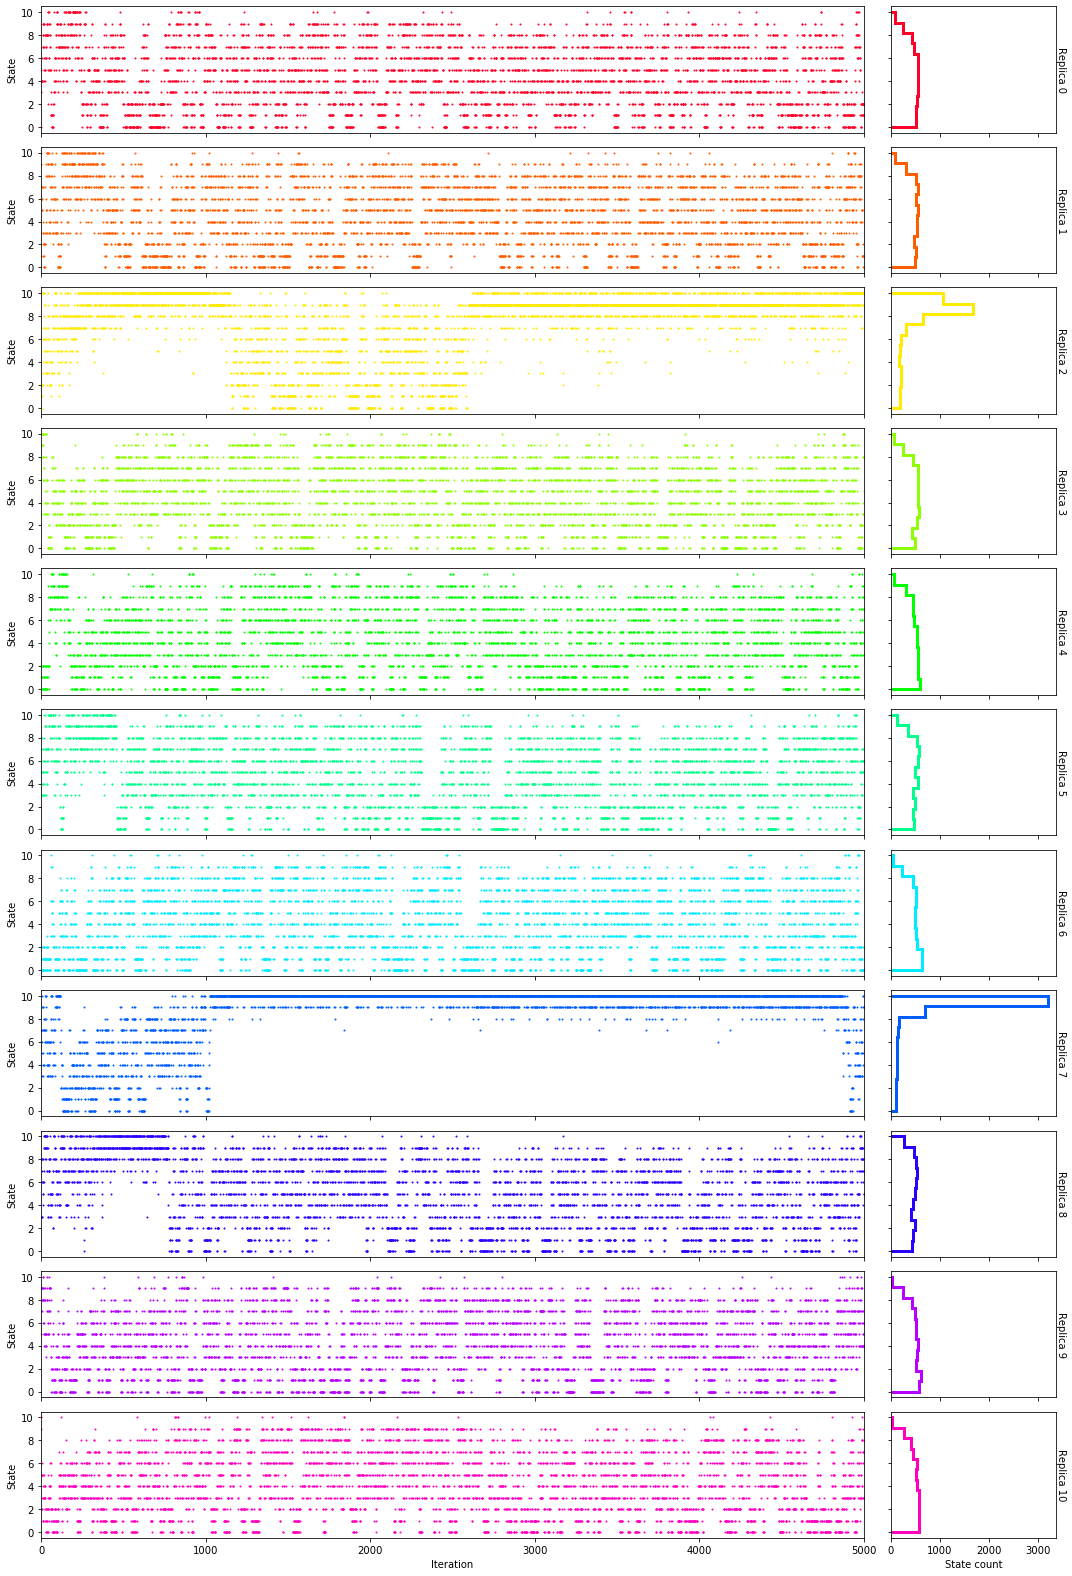

In [34]:
from perses.analysis import utils

utils.plot_replica_mixing("/data/chodera/zhangi/perses_benchmark/repex/0/0/0_solvent.nc", filename="")